<a href="https://colab.research.google.com/github/Manav-Khandurie/Breast-Cancer-ML-Models/blob/main/BreastCancerMLModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Prediction
This notebook contains code for all the models used for project

# Data Collection
The dataset used in this analysis is present at
https://www.kaggle.com/datasets/reihanenamdari/breast-cancer/code

In [ ]:
# Imp Libaray
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Assuming 'df' is your DataFrame
df = pd.read_csv("/content/sample_data/data.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# **Data PreProcessing**

## **Data Cleaning**

In [ ]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Removing duplicates
data = df.drop_duplicates()


Missing values:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_wors

In [ ]:
#Droping the Unnamed coloumn

df.drop(['id','Unnamed: 32'],axis=1, inplace=True)

In [ ]:
df.head()
df.tail()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
564                0.2216          0.2060                  0.07115  
565                0.1628          0.2572                  0.06637  
566                0.1418          0.2218                  0.07820  
567                0.2650          0.4087                  0.12400  
568                0.0000          0.2871                  0.07039  

[5 rows x 31 columns]

## **Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Label encoding for target variable
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

In [ ]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [ ]:
df.tail()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
564                0.2216          0.2060                  0.07115  
565                0.1628          0.2572                  0.06637  
566                0.1418          0.2218                  0.07820  
567                0.2650          0.4087                  0.12400  
568                0.0000          0.2871                  0.07039  

[5 rows x 31 columns]

In [ ]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## **Data Scaling**

In [ ]:
# Split features and target variable
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled)
print(y)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]
0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


## **Data Spliting**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [ ]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
X_train = imputer.fit_transform(X_train)

# Transform the testing data using the trained imputer
X_test = imputer.transform(X_test)
print(y_train,y_test)

68     0
181    1
63     0
248    0
60     0
      ..
71     0
106    0
270    0
435    1
102    0
Name: diagnosis, Length: 455, dtype: int64 204    0
70     1
131    1
431    0
540    0
      ..
486    0
75     1
249    0
238    0
265    1
Name: diagnosis, Length: 114, dtype: int64


# **Exploratory Data Analysis (EDA)**


## **Descriptive Stats**

In [ ]:
df.describe().transpose()

count        mean         std         min  \
diagnosis                569.0    0.372583    0.483918    0.000000   
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se                  569.0   40.337079   45.491006    6.802000   
smoothness_se            569.0    0.007041    0.003003    0.001713   
compactness_se           569.0    0.025478    0.017908    0.002252   
concavity_se             569.0    0.031894    0.030186    0.000000   
concave points_se        569.0    0.011796    0.006170    0.000000   
symmetry_se              569.0    0.020542    0.008266    0.007882   
fractal_dimension_se     569.0    0.003795    0.002646    0.000895   
radius_worst             569.0   16.269190    4.833242    7.930000   
texture_worst            569.0   25.677223    6.146258   12.020000   
perimeter_worst          569.0  107.261213   33.602542   50.410000   
area_worst               569.0  880.583128  569.356993  185.200000   
smoothness_worst         569.0    0.132369    0.022832    0.071170   
compactness_worst        569.0    0.254265    0.157336    0.027290   
concavity_worst          569.0    0.272188    0.208624    0.000000   
concave points_worst     569.0    0.114606    0.065732    0.000000   
symmetry_worst           569.0    0.290076    0.061867    0.156500   
fractal_dimension_worst  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
diagnosis                  0.000000    0.000000     1.000000     1.00000  
radius_mean               11.700000   13.370000    15.780000    28.11000  
texture_mean              16.170000   18.840000    21.800000    39.28000  
perimeter_mean            75.170000   86.240000   104.100000   188.50000  
area_mean                420.300000  551.100000   782.700000  2501.00000  
smoothness_mean            0.086370    0.095870     0.105300     0.16340  
compactness_mean           0.064920    0.092630     0.130400     0.34540  
concavity_mean             0.029560    0.061540     0.130700     0.42680  
concave points_mean        0.020310    0.033500     0.074000     0.20120  
symmetry_mean              0.161900    0.179200     0.195700     0.30400  
fractal_dimension_mean     0.057700    0.061540     0.066120     0.09744  
radius_se                  0.232400    0.324200     0.478900     2.87300  
texture_se                 0.833900    1.108000     1.474000     4.88500  
perimeter_se               1.606000    2.287000     3.357000    21.98000  
area_se                   17.850000   24.530000    45.190000   542.20000  
smoothness_se              0.005169    0.006380     0.008146     0.03113  
compactness_se             0.013080    0.020450     0.032450     0.13540  
concavity_se               0.015090    0.025890     0.042050     0.39600  
concave points_se          0.007638    0.010930     0.014710     0.05279  
symmetry_se                0.015160    0.018730     0.023480     0.07895  
fractal_dimension_se       0.002248    0.003187     0.004558     0.02984  
radius_worst              13.010000   14.970000    18.790000    36.04000  
texture_worst             21.080000   25.410000    29.72000

## **Scatter Plot**

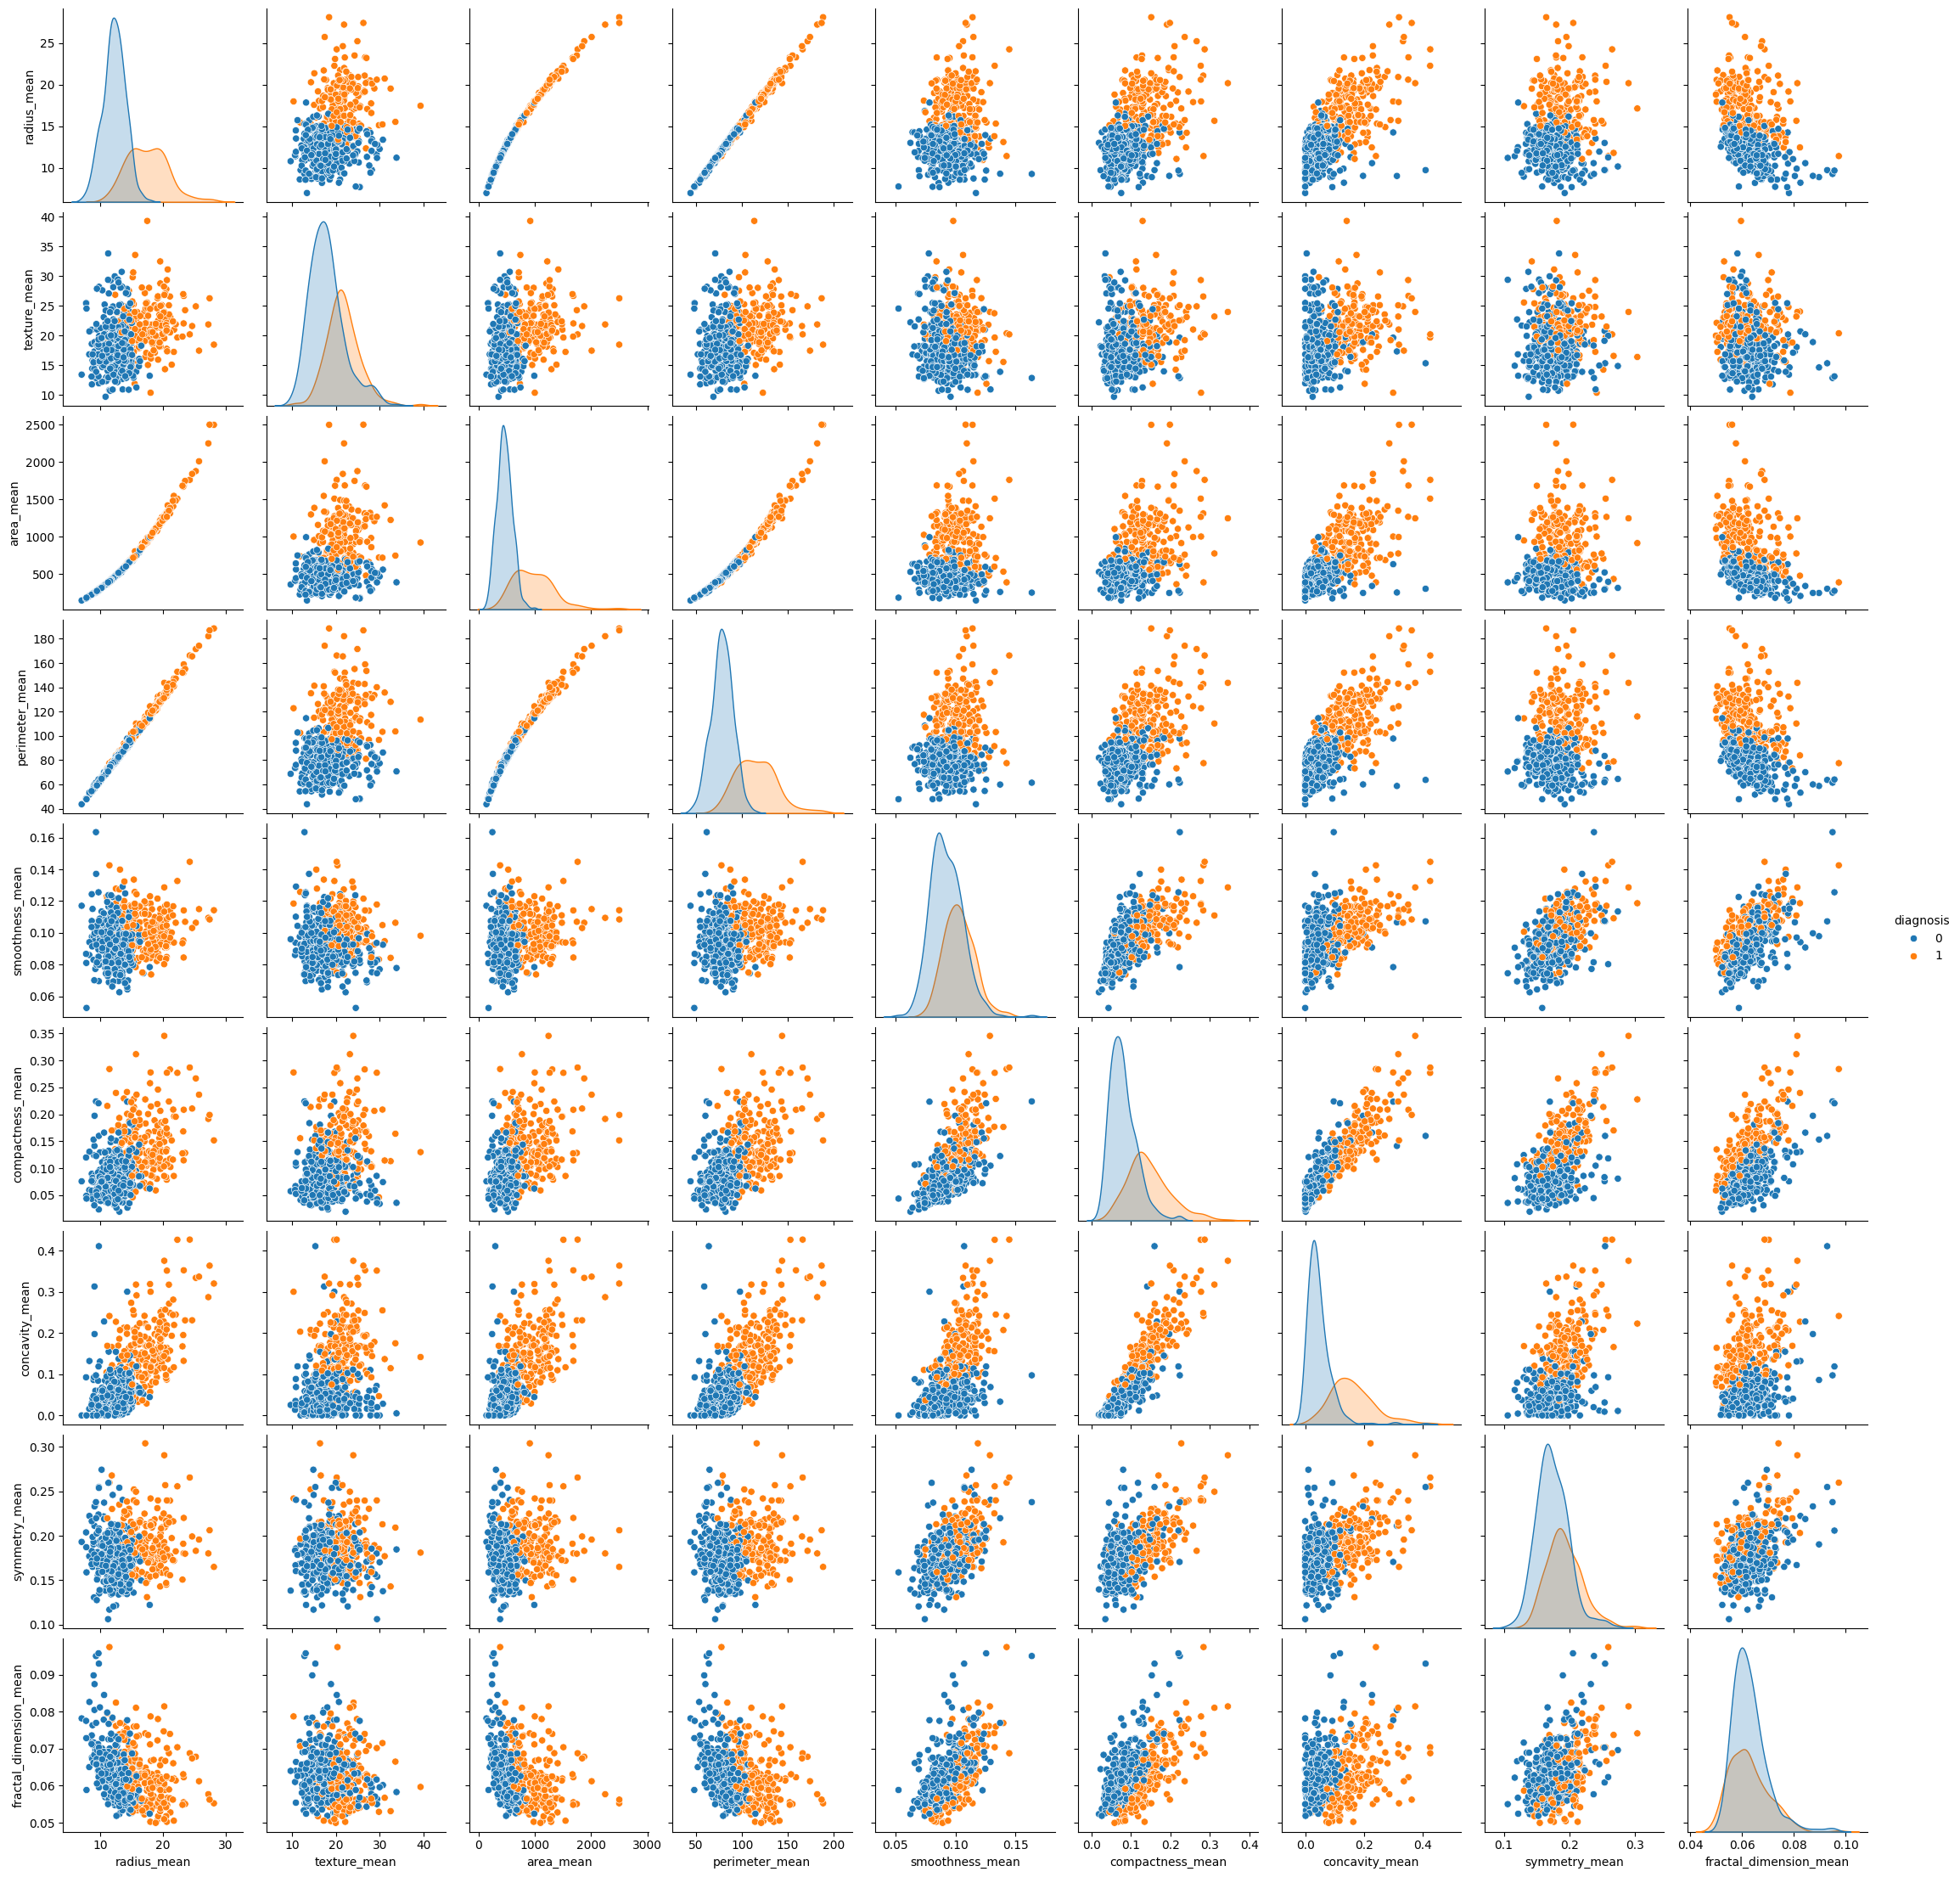

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Explore the dataset
sns.pairplot(df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'area_mean', 'perimeter_mean','smoothness_mean','compactness_mean','concavity_mean','symmetry_mean','fractal_dimension_mean'])
plt.show()



## **Count Plot**

<Axes: xlabel='diagnosis', ylabel='count'>

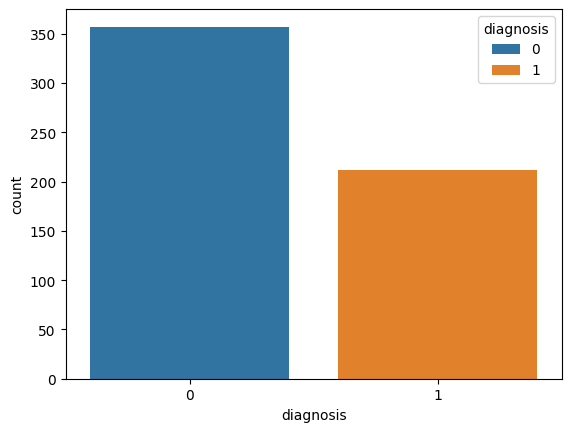

In [ ]:
sns.countplot(x='diagnosis' , hue='diagnosis', data=df)

## **Corelation Matrix**

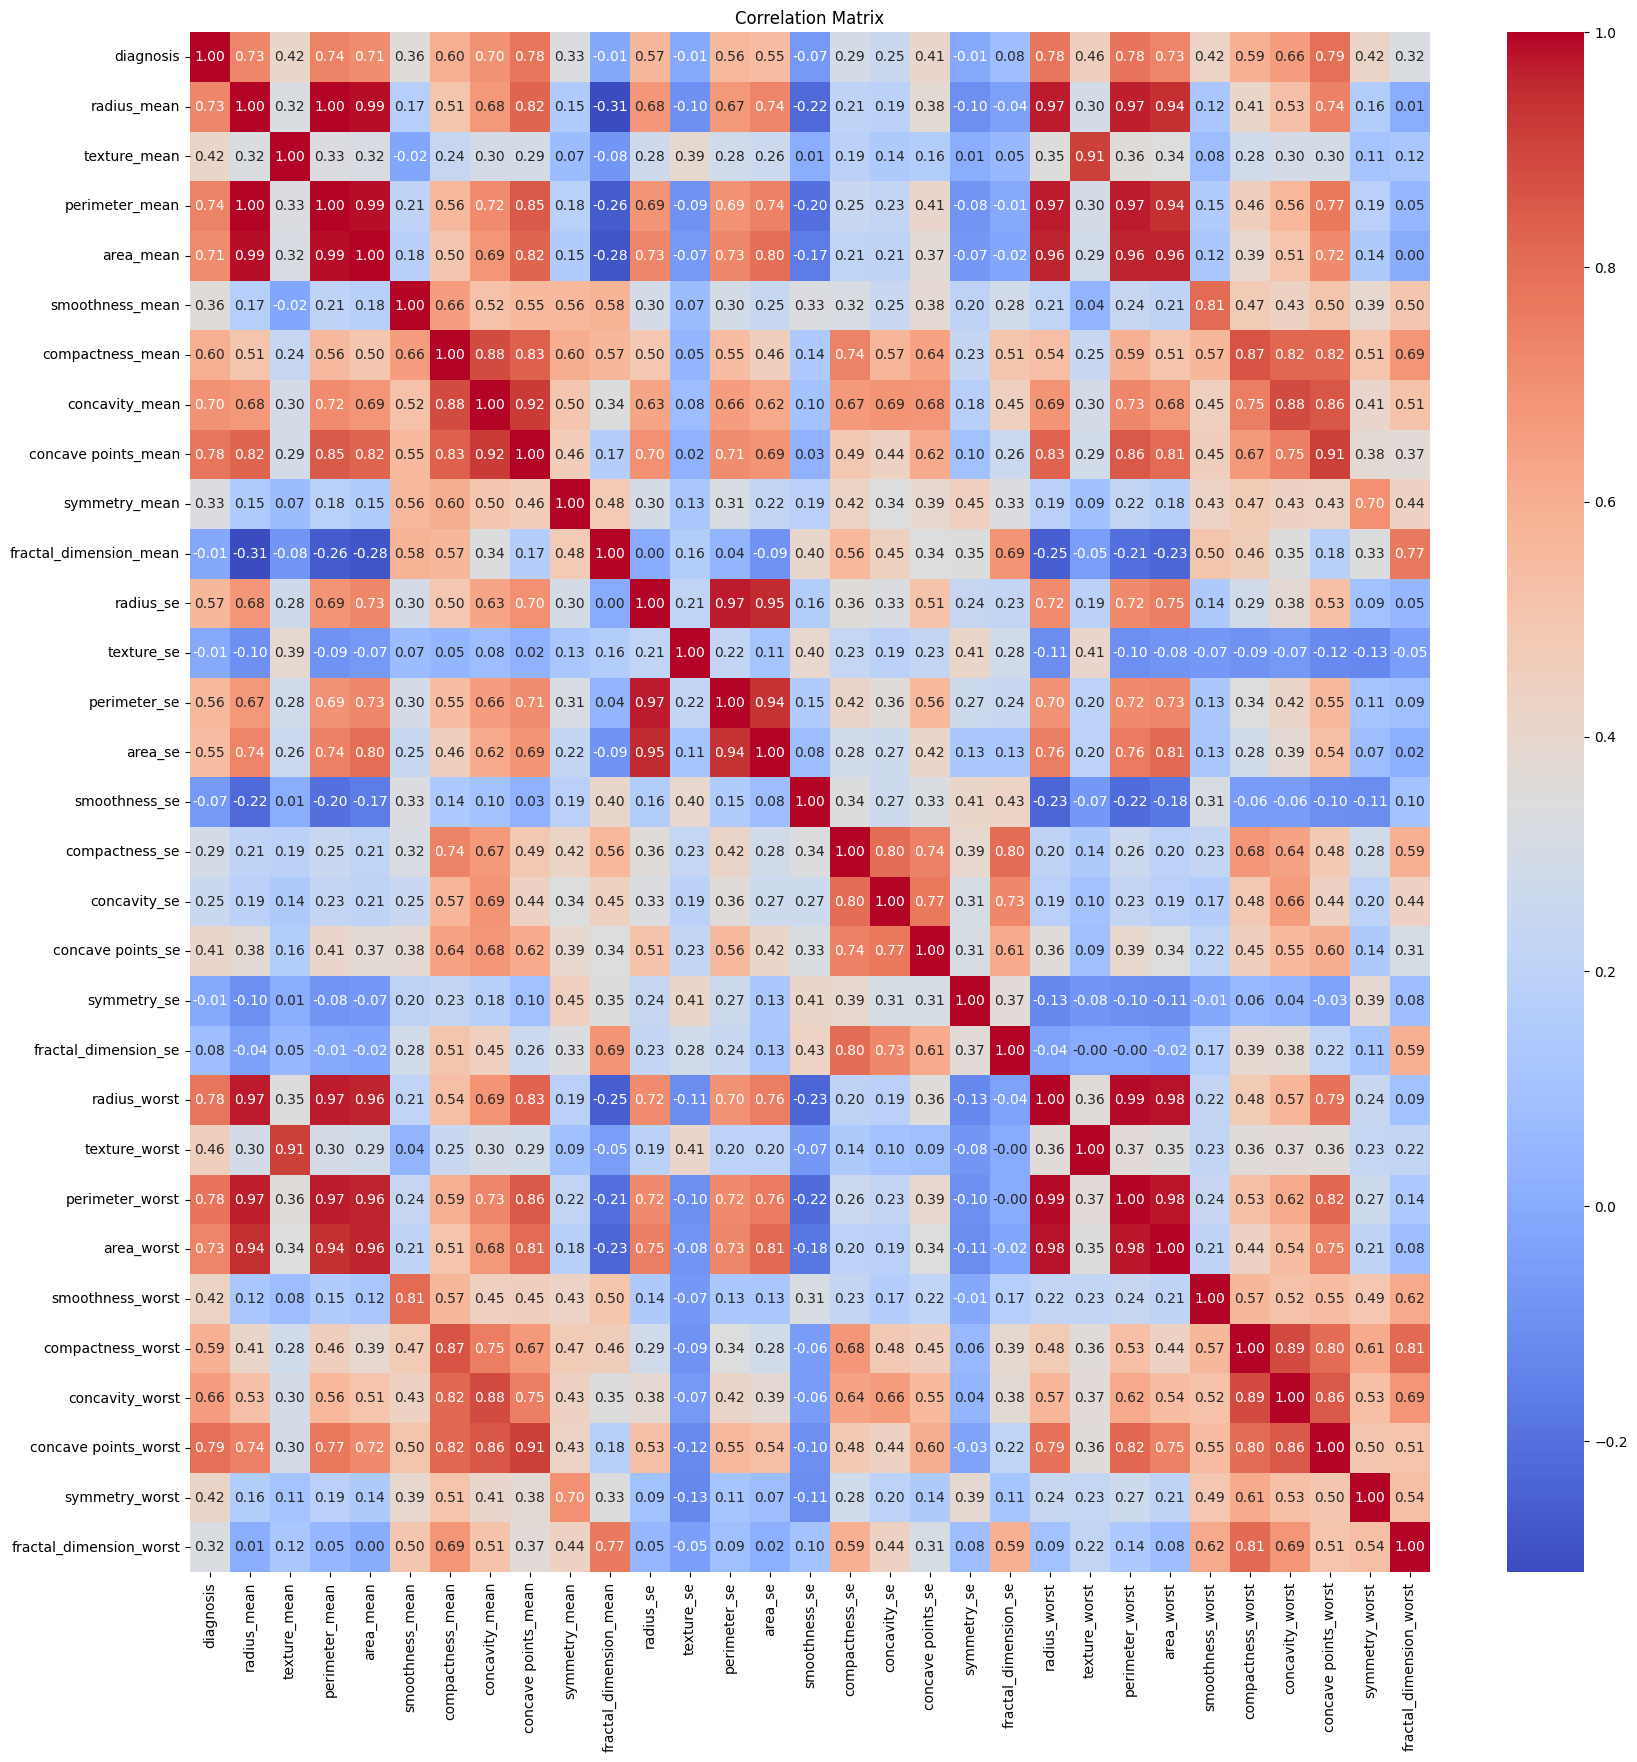

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

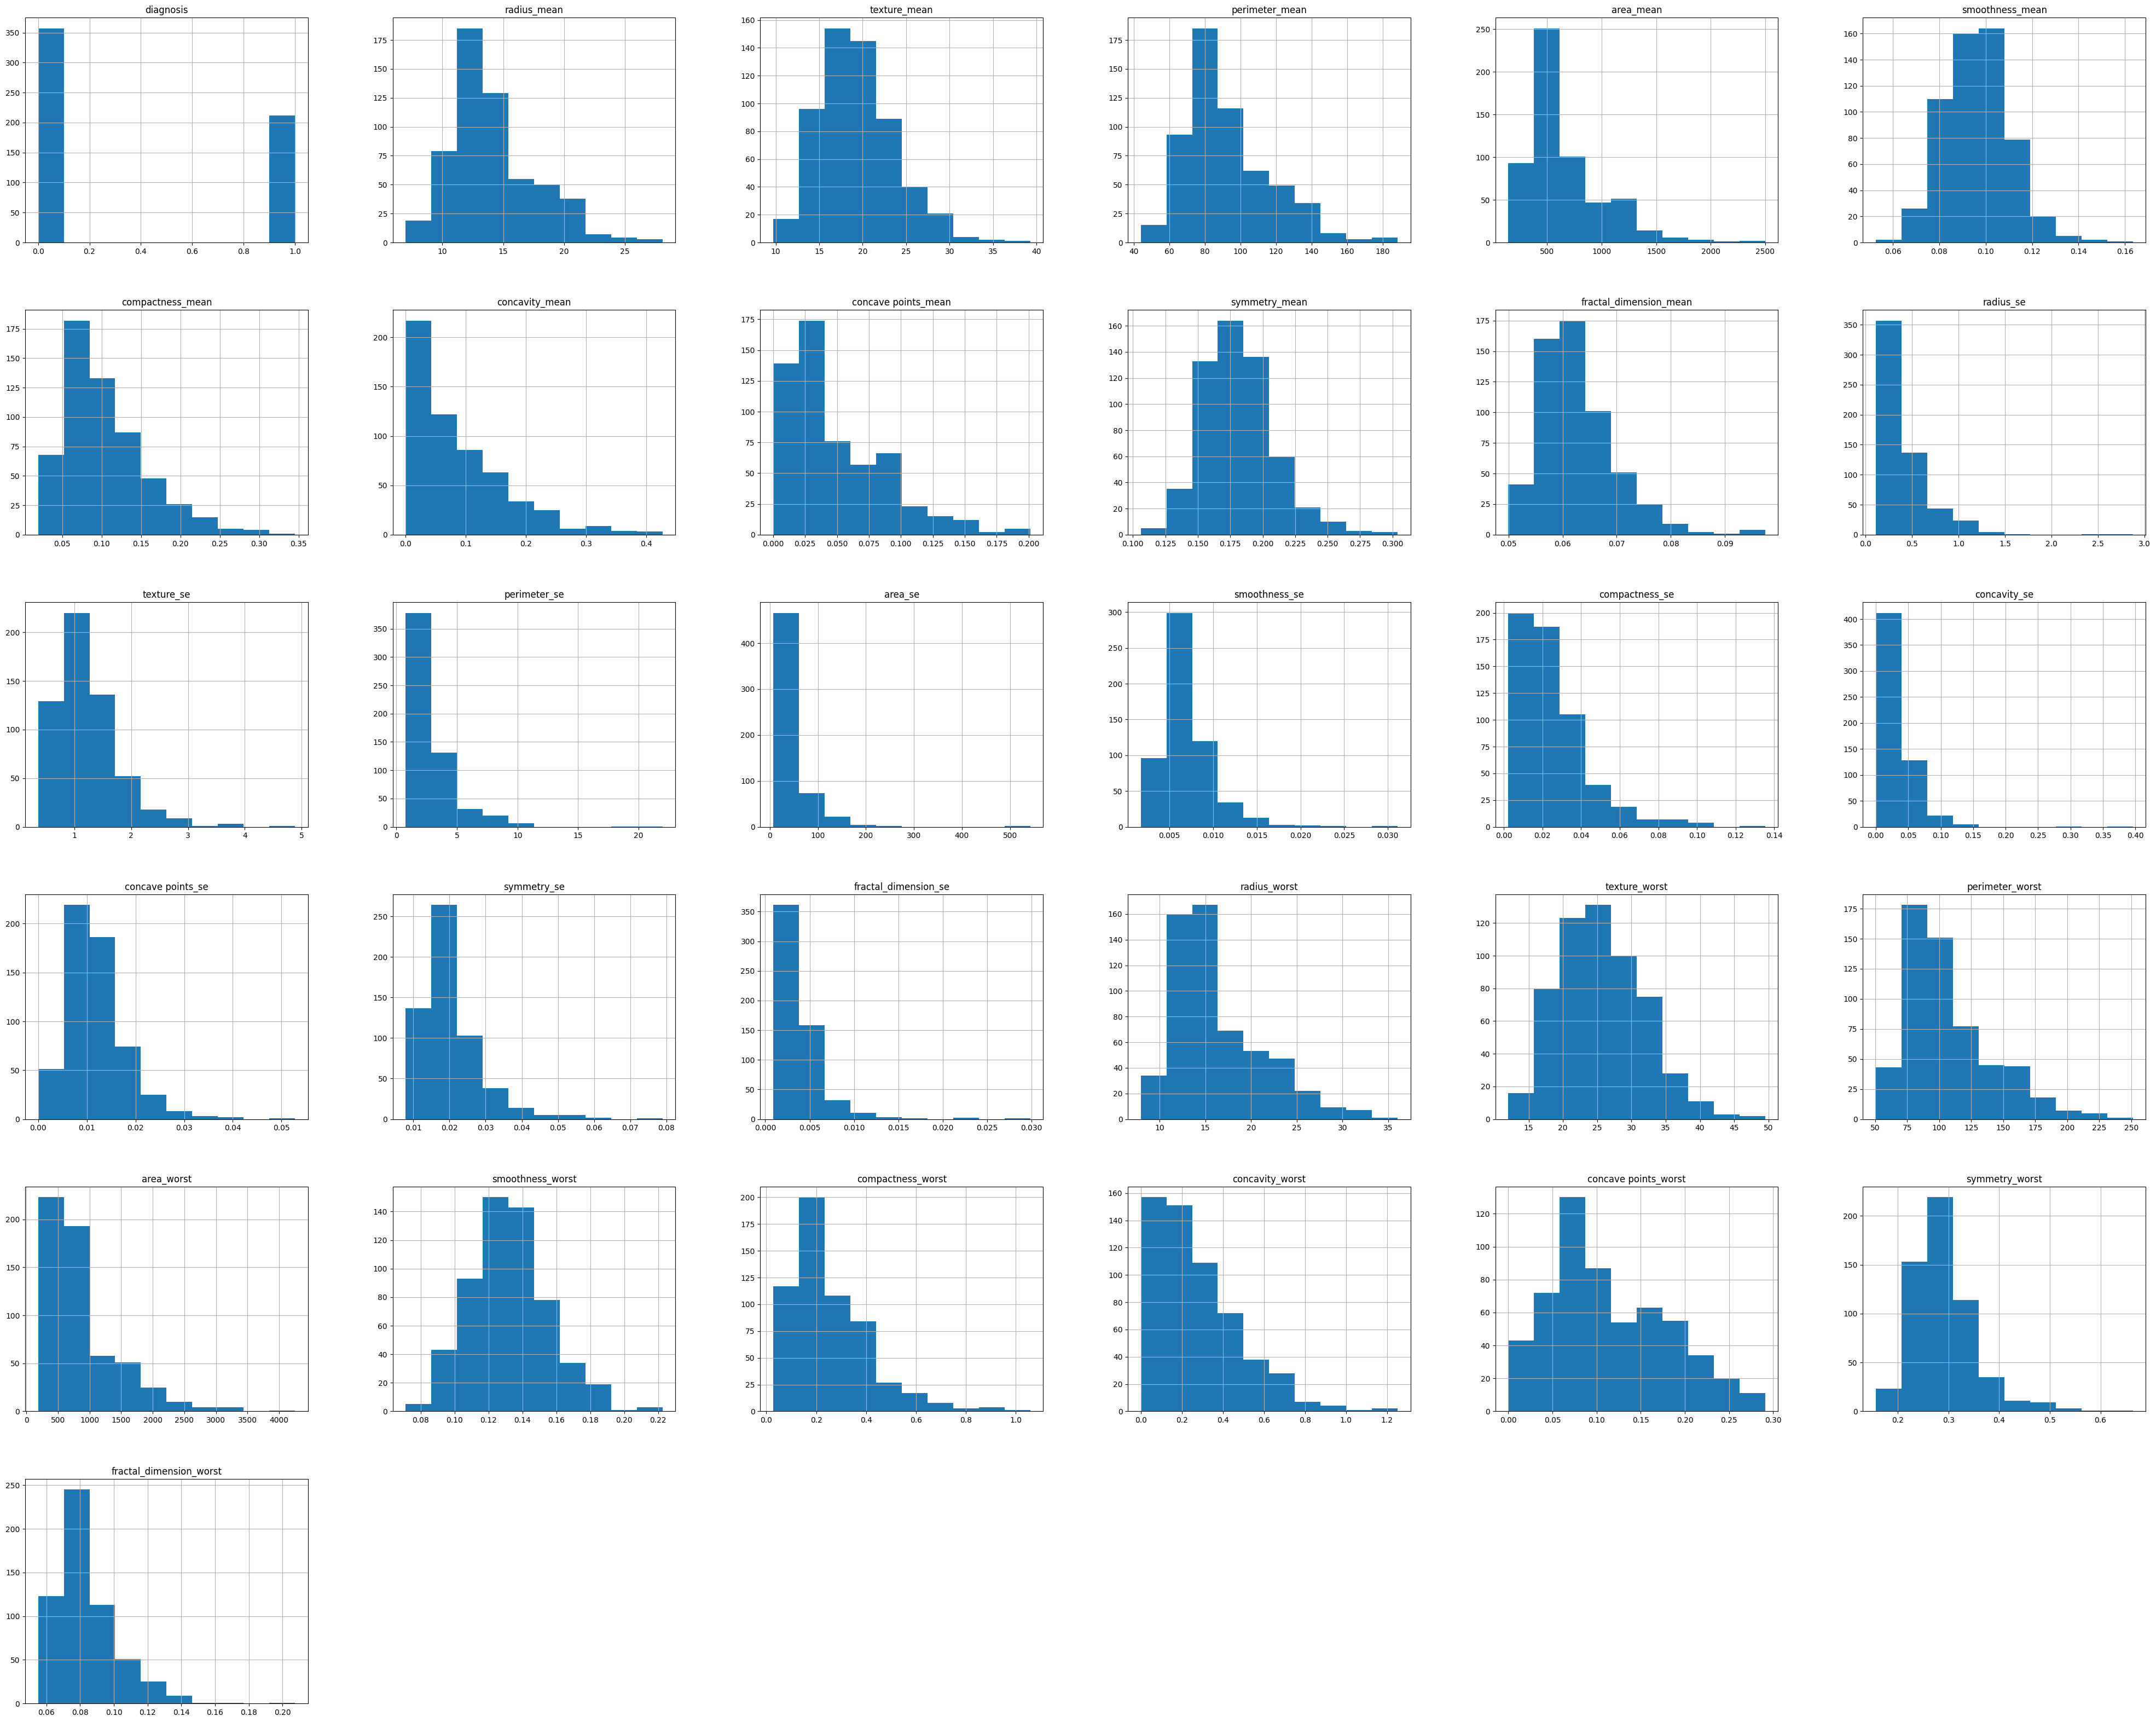

In [ ]:
df.hist(figsize=(50, 40))
plt.show()

# **Model Training & Testing**

## **initialization**

Initialising separate dictionaries to store the test results for later analysis and comparison

In [ ]:
RFC={};
SVM={};
KNN={};
XGB={};
LR={};
ANN={};

## **Random Forests**

### RFC Model Trainning - No Tuning

In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import time

start_time=time.time()
# Initialize Random Forest classifier without hyperparameter tuning
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)
end_time=time.time();
total_time=end_time-start_time;

# Make predictions on the testing set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, pos_label=1)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
rf_auc_roc = roc_auc_score(y_test, rf_predictions)

# Print evaluation metrics
print("Random Forest Classifier Evaluation without Hyperparameter Tuning:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}")
print(f"AUC-ROC Score: {rf_auc_roc}")
print(f'Training Time: {total_time}');



Random Forest Classifier Evaluation without Hyperparameter Tuning:
Accuracy: 0.9649122807017544
Precision: 0.975609756097561
Recall: 0.9302325581395349
F1 Score: 0.9523809523809524
AUC-ROC Score: 0.9580740255486406
Training Time: 0.2307877540588379



### RFC Model Trainning - HyperParameter Tuning

In [ ]:
import joblib
import time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

start_time_rf=time.time()


# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest classifier
rf_model_rf = RandomForestClassifier(random_state=42)

# Initialize Grid Search with 5-fold cross-validation
grid_search_rf = GridSearchCV(estimator=rf_model_rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform Grid Search
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params_rf = grid_search_rf.best_params_
best_estimator_rf = grid_search_rf.best_estimator_

end_time_rf=time.time();
total_time_rf=end_time_rf-start_time_rf;


# Print the best parameters
print("Best Hyperparameters:")
print(best_params_rf)


# Save the trained model as a joblib file
joblib.dump(best_estimator_rf, 'RFC-Model.joblib')


Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


['RFC-Model.joblib']

### **RFC Model Testing**

In [ ]:
# Make predictions on the testing set using the best estimator
best_predictions = best_estimator_rf.predict(X_test)

# Evaluate the model with best parameters
best_accuracy_rf = accuracy_score(y_test, best_predictions)
best_precision_rf = precision_score(y_test, best_predictions)
best_recall_rf = recall_score(y_test, best_predictions)
best_f1_rf = f1_score(y_test, best_predictions)
best_auc_roc_rf = roc_auc_score(y_test, best_predictions)

RFC['best_accuracy']=best_accuracy_rf;
RFC['best_precision']=best_precision_rf;
RFC['best_recall']=best_recall_rf;
RFC['best_f1']=best_f1_rf;
RFC['best_auc_roc']=best_auc_roc_rf;
RFC['total_time']=total_time_rf;

# Print evaluation metrics
print("\nRandom Forest Classifier with Best Hyperparameters Evaluation:")
print(f"Accuracy: {best_accuracy_rf}")
print(f"Precision: {best_precision_rf}")
print(f"Recall: {best_recall_rf}")
print(f"F1 Score: {best_f1_rf}")
print(f"AUC-ROC Score: {best_auc_roc_rf}")
print(f'Training Time: {total_time_rf}');
print(RFC);


Random Forest Classifier with Best Hyperparameters Evaluation:
Accuracy: 0.9649122807017544
Precision: 0.975609756097561
Recall: 0.9302325581395349
F1 Score: 0.9523809523809524
AUC-ROC Score: 0.9580740255486406
Training Time: 149.2591164112091
{'best_accuracy': 0.9649122807017544, 'best_precision': 0.975609756097561, 'best_recall': 0.9302325581395349, 'best_f1': 0.9523809523809524, 'best_auc_roc': 0.9580740255486406, 'total_time': 149.2591164112091}


## **SVM**

### SVM Model Trainning - No Tuning

In [ ]:
from sklearn.svm import SVC
import time
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


start_time = time.time()

# Initialize SVM classifier without hyperparameter tuning
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

end_time = time.time()
total_time = end_time - start_time

# Make predictions on the testing set
svm_predictions = svm_model.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)
svm_auc_roc = roc_auc_score(y_test, svm_predictions)

# Print evaluation metrics
print("SVM Classifier Evaluation without Hyperparameter Tuning:")
print(f"Accuracy: {svm_accuracy}")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"F1 Score: {svm_f1}")
print(f"AUC-ROC Score: {svm_auc_roc}")
print(f'Training Time: {total_time}')


SVM Classifier Evaluation without Hyperparameter Tuning:
Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1 Score: 0.9647058823529412
AUC-ROC Score: 0.9697019325253848
Training Time: 0.01003885269165039


### SVM Model Trainning - HyperParameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

start_time = time.time()

# Define the reduced hyperparameters grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale']
}

# Initialize SVM classifier
svm_model = SVC(random_state=42)

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

end_time = time.time()
total_time = end_time - start_time

# Print the best parameters
print("Best Hyperparameters:")
print(best_params)


# Save the trained model as a joblib file
joblib.dump(best_estimator, 'SVM-Model.joblib')


Best Hyperparameters:
{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


['SVM-Model.joblib']

### **SVM Model Testing**

In [ ]:
# Make predictions on the testing set using the best estimator
best_predictions = best_estimator.predict(X_test)

# Evaluate the model with best parameters
best_accuracy = accuracy_score(y_test, best_predictions)
best_precision = precision_score(y_test, best_predictions)
best_recall = recall_score(y_test, best_predictions)
best_f1 = f1_score(y_test, best_predictions)
best_auc_roc = roc_auc_score(y_test, best_predictions)

SVM['best_accuracy']=best_accuracy;
SVM['best_precision']=best_precision;
SVM['best_recall']=best_recall;
SVM['best_f1']=best_f1;
SVM['best_auc_roc']=best_auc_roc;
SVM['total_time']=total_time;

# Print evaluation metrics
print("\nRandom Forest Classifier with Best Hyperparameters Evaluation:")
print(f"Accuracy: {best_accuracy}")
print(f"Precision: {best_precision}")
print(f"Recall: {best_recall}")
print(f"F1 Score: {best_f1}")
print(f"AUC-ROC Score: {best_auc_roc}")
print(f'Training Time: {total_time}');
print(SVM)


Random Forest Classifier with Best Hyperparameters Evaluation:
Accuracy: 0.9824561403508771
Precision: 1.0
Recall: 0.9534883720930233
F1 Score: 0.9761904761904763
AUC-ROC Score: 0.9767441860465116
Training Time: 0.18598294258117676
{'best_accuracy': 0.9824561403508771, 'best_precision': 1.0, 'best_recall': 0.9534883720930233, 'best_f1': 0.9761904761904763, 'best_auc_roc': 0.9767441860465116, 'total_time': 0.18598294258117676}


## **KNN**

### **KNN Model Trainning - No Tuning**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import time

start_time = time.time()

# Initialize KNN classifier without hyperparameter tuning
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

end_time = time.time()
total_time = end_time - start_time

# Make predictions on the testing set
knn_predictions = knn_model.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)
knn_auc_roc = roc_auc_score(y_test, knn_predictions)

# Print evaluation metrics
print("KNN Classifier Evaluation without Hyperparameter Tuning:")
print(f"Accuracy: {knn_accuracy}")
print(f"Precision: {knn_precision}")
print(f"Recall: {knn_recall}")
print(f"F1 Score: {knn_f1}")
print(f"AUC-ROC Score: {knn_auc_roc}")
print(f'Training Time: {total_time}')


KNN Classifier Evaluation without Hyperparameter Tuning:
Accuracy: 0.9473684210526315
Precision: 0.9302325581395349
Recall: 0.9302325581395349
F1 Score: 0.9302325581395349
AUC-ROC Score: 0.9439895185063871
Training Time: 0.0015456676483154297


### **KNN Model Trainning - HyperParameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()

# Define the hyperparameters grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Initialize KNN classifier
knn_model = KNeighborsClassifier()

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

end_time = time.time()
total_time = end_time - start_time

# Print the best parameters
print("Best Hyperparameters:")
print(best_params)


# Save the trained model as a joblib file
joblib.dump(best_estimator, 'KNN-Model.joblib')


Best Hyperparameters:
{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


['KNN-Model.joblib']

### **KNN Model Testing**

In [ ]:
# Make predictions on the testing set using the best estimator
best_predictions = best_estimator.predict(X_test)

# Evaluate the model with best parameters
best_accuracy = accuracy_score(y_test, best_predictions)
best_precision = precision_score(y_test, best_predictions)
best_recall = recall_score(y_test, best_predictions)
best_f1 = f1_score(y_test, best_predictions)
best_auc_roc = roc_auc_score(y_test, best_predictions)

KNN['best_accuracy']=best_accuracy;
KNN['best_precision']=best_precision;
KNN['best_recall']=best_recall;
KNN['best_f1']=best_f1;
KNN['best_auc_roc']=best_auc_roc;
KNN['total_time']=total_time;

# Print evaluation metrics
print("\nRandom Forest Classifier with Best Hyperparameters Evaluation:")
print(f"Accuracy: {best_accuracy}")
print(f"Precision: {best_precision}")
print(f"Recall: {best_recall}")
print(f"F1 Score: {best_f1}")
print(f"AUC-ROC Score: {best_auc_roc}")
print(f'Training Time: {total_time}');
print(KNN)


Random Forest Classifier with Best Hyperparameters Evaluation:
Accuracy: 0.9649122807017544
Precision: 0.9534883720930233
Recall: 0.9534883720930233
F1 Score: 0.9534883720930233
AUC-ROC Score: 0.9626596790042581
Training Time: 2.386115789413452
{'best_accuracy': 0.9649122807017544, 'best_precision': 0.9534883720930233, 'best_recall': 0.9534883720930233, 'best_f1': 0.9534883720930233, 'best_auc_roc': 0.9626596790042581, 'total_time': 2.386115789413452}


## **XGB**

### **XGB Model Trainning - No Tuning**

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time

# Start timing
start_time = time.time()

# Initialize XGBoost classifier without hyperparameter tuning
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the testing set
xgb_predictions = xgb_model.predict(X_test)

# End timing
end_time = time.time()
total_time = end_time - start_time

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions)
xgb_recall = recall_score(y_test, xgb_predictions)
xgb_f1 = f1_score(y_test, xgb_predictions)
xgb_auc_roc = roc_auc_score(y_test, xgb_predictions)

# Print evaluation metrics
print("XGBoost Classifier Evaluation without Hyperparameter Tuning:")
print(f"Accuracy: {xgb_accuracy}")
print(f"Precision: {xgb_precision}")
print(f"Recall: {xgb_recall}")
print(f"F1 Score: {xgb_f1}")
print(f"AUC-ROC Score: {xgb_auc_roc}")
print(f"Training Time: {total_time} seconds")

XGBoost Classifier Evaluation without Hyperparameter Tuning:
Accuracy: 0.956140350877193
Precision: 0.9523809523809523
Recall: 0.9302325581395349
F1 Score: 0.9411764705882352
AUC-ROC Score: 0.9510317720275139
Training Time: 0.11527109146118164 seconds


### **XGB Model Trainning - HyperParameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import time

# Start timing
start_time = time.time()

# Define the parameter distributions for tuning
param_dist = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1]
}

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Perform RandomizedSearchCV with 5-fold cross-validation and 100 iterations
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

# Train the model with the best parameters
best_estimator = xgb.XGBClassifier(**best_params, random_state=42)
best_estimator.fit(X_train, y_train)

# End timing
end_time = time.time()
total_time = end_time - start_time

# Print the best parameters and test accuracy
print("Best Hyperparameters:")
print(best_params)

# Save the trained model as a joblib file
joblib.dump(best_estimator, 'XGB-Model.joblib')


Best Hyperparameters:
{'subsample': 0.5, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.5}


['XGB-Model.joblib']

### **XGB Model Testing**

In [ ]:
# Make predictions on the testing set using the best estimator
best_predictions = best_estimator.predict(X_test)

# Evaluate the model with best parameters
best_accuracy = accuracy_score(y_test, best_predictions)
best_precision = precision_score(y_test, best_predictions)
best_recall = recall_score(y_test, best_predictions)
best_f1 = f1_score(y_test, best_predictions)
best_auc_roc = roc_auc_score(y_test, best_predictions)

XGB['best_accuracy']=best_accuracy;
XGB['best_precision']=best_precision;
XGB['best_recall']=best_recall;
XGB['best_f1']=best_f1;
XGB['best_auc_roc']=best_auc_roc;
XGB['total_time']=total_time;

# Print evaluation metrics
print("\nRandom Forest Classifier with Best Hyperparameters Evaluation:")
print(f"Accuracy: {best_accuracy}")
print(f"Precision: {best_precision}")
print(f"Recall: {best_recall}")
print(f"F1 Score: {best_f1}")
print(f"AUC-ROC Score: {best_auc_roc}")
print(f'Training Time: {total_time}');
print(XGB)


Random Forest Classifier with Best Hyperparameters Evaluation:
Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1 Score: 0.9647058823529412
AUC-ROC Score: 0.9697019325253848
Training Time: 68.52268648147583
{'best_accuracy': 0.9736842105263158, 'best_precision': 0.9761904761904762, 'best_recall': 0.9534883720930233, 'best_f1': 0.9647058823529412, 'best_auc_roc': 0.9697019325253848, 'total_time': 68.52268648147583}


## **Logistic Regression**

### **Logistic Regression Trainning - No Tuning**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time
import joblib
# Start timing
start_time = time.time()

# Initialize Logistic Regression classifier without hyperparameter tuning
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
logistic_predictions = logistic_model.predict(X_test)

# End timing
end_time = time.time()
total_time = end_time - start_time

# Evaluate the model
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_precision = precision_score(y_test, logistic_predictions)
logistic_recall = recall_score(y_test, logistic_predictions)
logistic_f1 = f1_score(y_test, logistic_predictions)
logistic_auc_roc = roc_auc_score(y_test, logistic_predictions)

# Print evaluation metrics
print("Logistic Regression Evaluation without Hyperparameter Tuning:")
print(f"Accuracy: {logistic_accuracy}")
print(f"Precision: {logistic_precision}")
print(f"Recall: {logistic_recall}")
print(f"F1 Score: {logistic_f1}")
print(f"AUC-ROC Score: {logistic_auc_roc}")
print(f"Training Time: {total_time} seconds")


Logistic Regression Evaluation without Hyperparameter Tuning:
Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1 Score: 0.9647058823529412
AUC-ROC Score: 0.9697019325253848
Training Time: 0.02982354164123535 seconds


### **Logistic Regression Model Trainning - HyperParameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import joblib
import time

# Start timing
start_time = time.time()


# Define the parameter distributions for tuning
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization parameter
    'penalty': ['l1', 'l2'],                     # Penalty term
    'solver': ['liblinear', 'saga'],             # Algorithm to use in the optimization problem
    'max_iter': [100, 200, 300, 400, 500]        # Maximum number of iterations for optimization
}

# Initialize Logistic Regression classifier
logistic_model = LogisticRegression(random_state=42)

# Perform RandomizedSearchCV with 5-fold cross-validation and 100 iterations
random_search = RandomizedSearchCV(estimator=logistic_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

# Train the model with the best parameters
best_estimator = LogisticRegression(**best_params, random_state=42)
best_estimator.fit(X_train, y_train)

# End timing
end_time = time.time()
total_time_lr = end_time - start_time

# Print the best parameters and test accuracy
print("Best Hyperparameters:")
print(best_params)

# Save the trained model as a joblib file
joblib.dump(best_estimator, 'LR_Model.joblib')


Best Hyperparameters:
{'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'C': 0.1}


['LR_Model.joblib']

### **Logistic Regression Testing**

In [ ]:
# Make predictions on the testing set using the best estimator
best_predictions = best_estimator.predict(X_test)

# Evaluate the model with best parameters
best_accuracy_lr = accuracy_score(y_test, best_predictions)
best_precision_lr = precision_score(y_test, best_predictions)
best_recall_lr = recall_score(y_test, best_predictions)
best_f1_lr = f1_score(y_test, best_predictions)
best_auc_roc_lr = roc_auc_score(y_test, best_predictions)

LR['best_accuracy']=best_accuracy_lr;
LR['best_precision']=best_precision_lr;
LR['best_recall']=best_recall_lr;
LR['best_f1']=best_f1_lr;
LR['best_auc_roc']=best_auc_roc_lr;
LR['total_time']=total_time_lr;

# Print evaluation metrics
print("\nRandom Forest Classifier with Best Hyperparameters Evaluation:")
print(f"Accuracy: {best_accuracy}")
print(f"Precision: {best_precision}")
print(f"Recall: {best_recall}")
print(f"F1 Score: {best_f1}")
print(f"AUC-ROC Score: {best_auc_roc}")
print(f'Training Time: {total_time}');
print(LR)


Random Forest Classifier with Best Hyperparameters Evaluation:
Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1 Score: 0.9647058823529412
AUC-ROC Score: 0.9697019325253848
Training Time: 0.02982354164123535
{'best_accuracy': 0.9912280701754386, 'best_precision': 1.0, 'best_recall': 0.9767441860465116, 'best_f1': 0.988235294117647, 'best_auc_roc': 0.9883720930232558, 'total_time': 13.06574559211731}


## **Artificial Neural Network**

### **ANN Model Training**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import time

# Start timing
start_time = time.time()
# Initialize the ANN
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Add additional hidden layers (optional)
model.add(Dense(units=64, activation='relu'))

# Add output layer
model.add(Dense(units=1, activation='sigmoid'))  # Use 'sigmoid' for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# End timing
end_time = time.time()
total_time = end_time - start_time

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

joblib.dump(model, 'ANN-Model.joblib')


Epoch 1/50
15/15 [==============================] - 1s 2ms/step - loss: 0.4963 - accuracy: 0.8374
Epoch 2/50
15/15 [==============================] - 0s 2ms/step - loss: 0.2387 - accuracy: 0.9363
Epoch 3/50
15/15 [==============================] - 0s 2ms/step - loss: 0.1541 - accuracy: 0.9538
Epoch 4/50
15/15 [==============================] - 0s 2ms/step - loss: 0.1166 - accuracy: 0.9626
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 0.0951 - accuracy: 0.9648
Epoch 6/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0813 - accuracy: 0.9868
Epoch 7/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0712 - accuracy: 0.9868
Epoch 8/50
15/15 [==============================] - 0s 3ms/step - loss: 0.0637 - accuracy: 0.9868
Epoch 9/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0576 - accuracy: 0.9890
Epoch 10/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 0.9868
Epoch 11/50
15/15 [

['ANN-Model.joblib']

### **ANN Model Testing**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


predictions = model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1) based on a threshold (e.g., 0.5 for binary classification)
binary_predictions = (predictions > 0.5).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, binary_predictions)
precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)
auc_roc = roc_auc_score(y_test, binary_predictions)

ANN['best_accuracy']=accuracy;
ANN['best_precision']=precision;
ANN['best_recall']=recall;
ANN['best_f1']=f1;
ANN['best_auc_roc']=auc_roc;
ANN['total_time']=total_time;

# Print evaluation metrics
print("ANN Classifier Evaluation:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC Score: {auc_roc}")
print(f"Testing Time: {total_time} seconds")
print(ANN)

4/4 [==============================] - 0s 3ms/step
ANN Classifier Evaluation:
Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1 Score: 0.9647058823529412
AUC-ROC Score: 0.9697019325253848
Testing Time: 3.3993005752563477 seconds
{'best_accuracy': 0.9736842105263158, 'best_precision': 0.9761904761904762, 'best_recall': 0.9534883720930233, 'best_f1': 0.9647058823529412, 'best_auc_roc': 0.9697019325253848, 'total_time': 3.3993005752563477}


# Results & Observations

## **All Calculated Results**

In [ ]:
print('\nRFC \n',RFC);
print('\nSVM \n',SVM);
print('\nKNN \n',KNN);
print('\nXGB \n',XGB);
print('\nLR \n',LR);
print('\nANN \n',ANN);


RFC 
 {'best_accuracy': 0.9649122807017544, 'best_precision': 0.975609756097561, 'best_recall': 0.9302325581395349, 'best_f1': 0.9523809523809524, 'best_auc_roc': 0.9580740255486406, 'total_time': 149.2591164112091}

SVM 
 {'best_accuracy': 0.9824561403508771, 'best_precision': 1.0, 'best_recall': 0.9534883720930233, 'best_f1': 0.9761904761904763, 'best_auc_roc': 0.9767441860465116, 'total_time': 0.18598294258117676}

KNN 
 {'best_accuracy': 0.9649122807017544, 'best_precision': 0.9534883720930233, 'best_recall': 0.9534883720930233, 'best_f1': 0.9534883720930233, 'best_auc_roc': 0.9626596790042581, 'total_time': 2.386115789413452}

XGB 
 {'best_accuracy': 0.9736842105263158, 'best_precision': 0.9761904761904762, 'best_recall': 0.9534883720930233, 'best_f1': 0.9647058823529412, 'best_auc_roc': 0.9697019325253848, 'total_time': 68.52268648147583}

LR 
 {'best_accuracy': 0.9912280701754386, 'best_precision': 1.0, 'best_recall': 0.9767441860465116, 'best_f1': 0.988235294117647, 'best_auc_

In [ ]:
import matplotlib.pyplot as plt

# Define dictionaries for the results
results = {
    'RFC': RFC,
    'SVM': SVM,
    'KNN': KNN,
    'XGB': XGB,
    'LR': LR,
    'ANN': ANN
}

# Extract metrics for visualization
models = list(results.keys())
accuracy = [results[model]['best_accuracy'] for model in models]
precision = [results[model]['best_precision'] for model in models]
recall = [results[model]['best_recall'] for model in models]
f1 = [results[model]['best_f1'] for model in models]
auc_roc = [results[model]['best_auc_roc'] for model in models]
total_time = [results[model]['total_time'] for model in models]

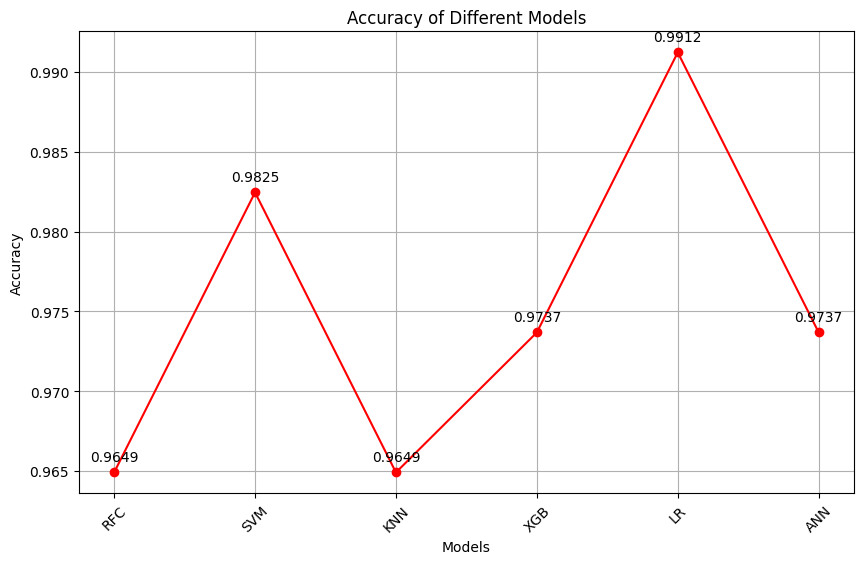

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot using a line plot with original values annotated
plt.figure(figsize=(10, 6))
plt.plot(models, accuracy, marker='o', color='red', linestyle='-')
plt.title('Accuracy of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(True)  # Add grid for better readability

# Annotate each data point with its original accuracy value
for i, acc in enumerate(accuracy):
    plt.annotate(f'{acc:.4f}', (models[i], acc), textcoords="offset points", xytext=(0,8), ha='center')

plt.show()


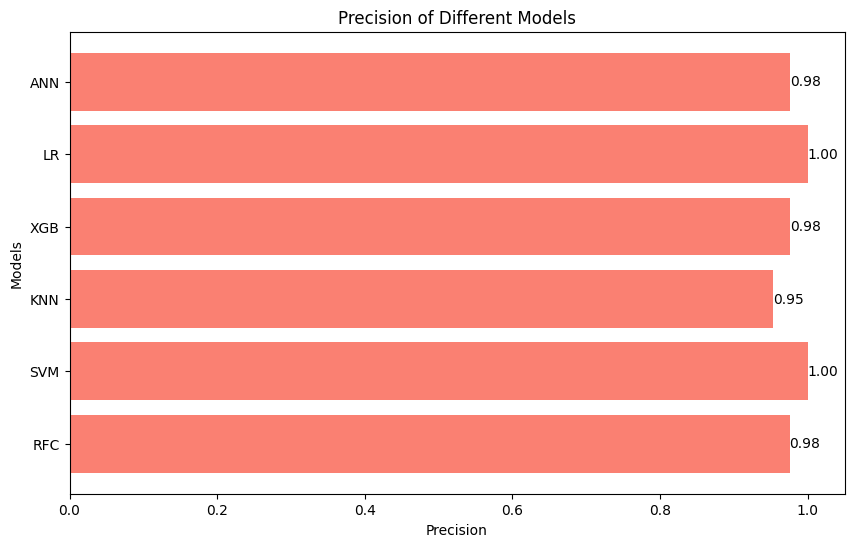

In [ ]:
import matplotlib.pyplot as plt

# Precision plot using horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(models, precision, color='salmon')
plt.title('Precision of Different Models')
plt.xlabel('Precision')
plt.ylabel('Models')

# Add precision values on top of each bar
for i, value in enumerate(precision):
    plt.text(value, i, f'{value:.2f}', ha='left', va='center')

plt.show()


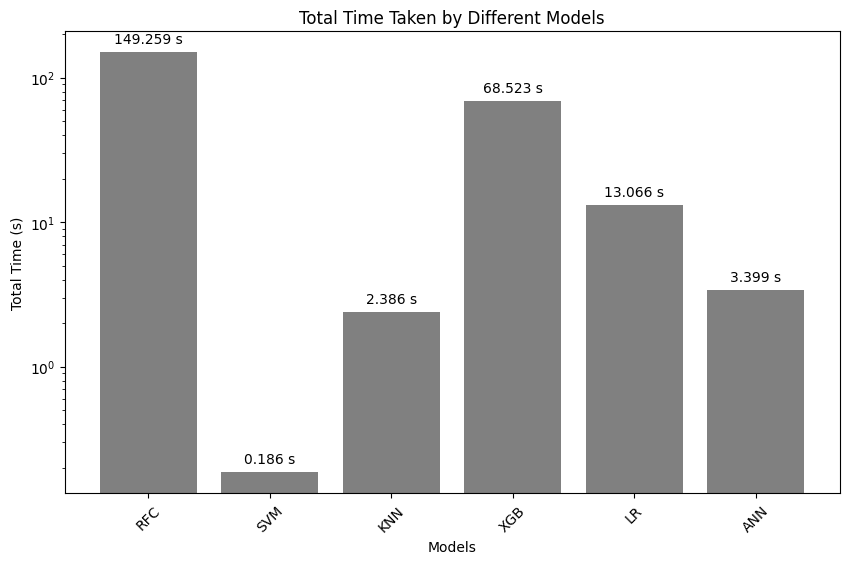

In [ ]:
import matplotlib.pyplot as plt

# Total time plot on a logarithmic scale
plt.figure(figsize=(10, 6))
bars = plt.bar(models, total_time, color='gray')

plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title('Total Time Taken by Different Models')
plt.xlabel('Models')
plt.ylabel('Total Time (s)')
plt.xticks(rotation=45)

# Annotate each bar with its original value (in seconds)
for bar, time in zip(bars, total_time):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 0.1 * bar.get_height(),
             f"{time:.3f} s",
             ha='center',
             va='bottom')

plt.show()


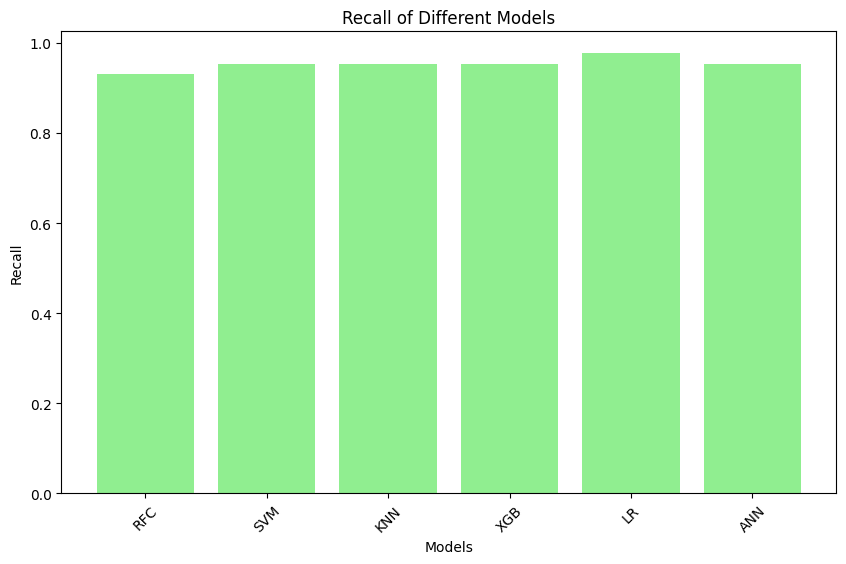

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['RFC', 'SVM', 'KNN', 'XGB', 'LR', 'ANN']
recall = [RFC['best_recall'], SVM['best_recall'], KNN['best_recall'],
          XGB['best_recall'], LR['best_recall'], ANN['best_recall']]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(models, recall, color='lightgreen')
plt.title('Recall of Different Models')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, auc

# # Data
# models = ['RFC', 'SVM', 'KNN', 'XGB', 'LR', 'ANN']
# auc_roc = [RFC['best_auc_roc'], SVM['best_auc_roc'], KNN['best_auc_roc'],
#            XGB['best_auc_roc'], LR['best_auc_roc'], ANN['best_auc_roc']]
# true_labels = ...  # True labels
# predicted_probs = {...}  # Dictionary with model names as keys and predicted probabilities as values

# # Plot
# plt.figure(figsize=(10, 6))
# for model in models:
#     fpr, tpr, _ = roc_curve(true_labels, predicted_probs[model])
#     roc_auc = auc(fpr, tpr)
#     plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

# plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend(loc="lower right")
# plt.show()


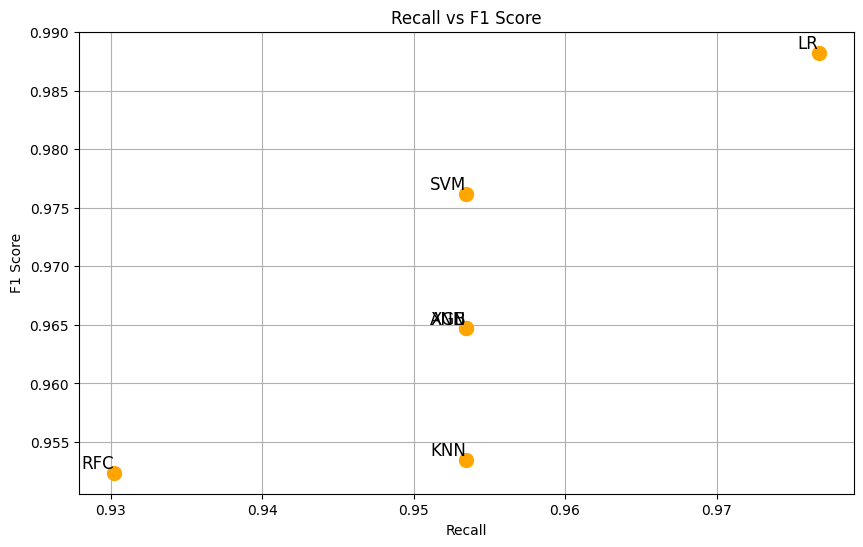

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['RFC', 'SVM', 'KNN', 'XGB', 'LR', 'ANN']
f1_score = [RFC['best_f1'], SVM['best_f1'], KNN['best_f1'],
            XGB['best_f1'], LR['best_f1'], ANN['best_f1']]
recall = [RFC['best_recall'], SVM['best_recall'], KNN['best_recall'],
          XGB['best_recall'], LR['best_recall'], ANN['best_recall']]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(recall, f1_score, color='orange', s=100)
for i, model in enumerate(models):
    plt.text(recall[i], f1_score[i], model, fontsize=12, ha='right', va='bottom')

plt.xlabel('Recall')
plt.ylabel('F1 Score')
plt.title('Recall vs F1 Score')
plt.grid(True)
plt.show()


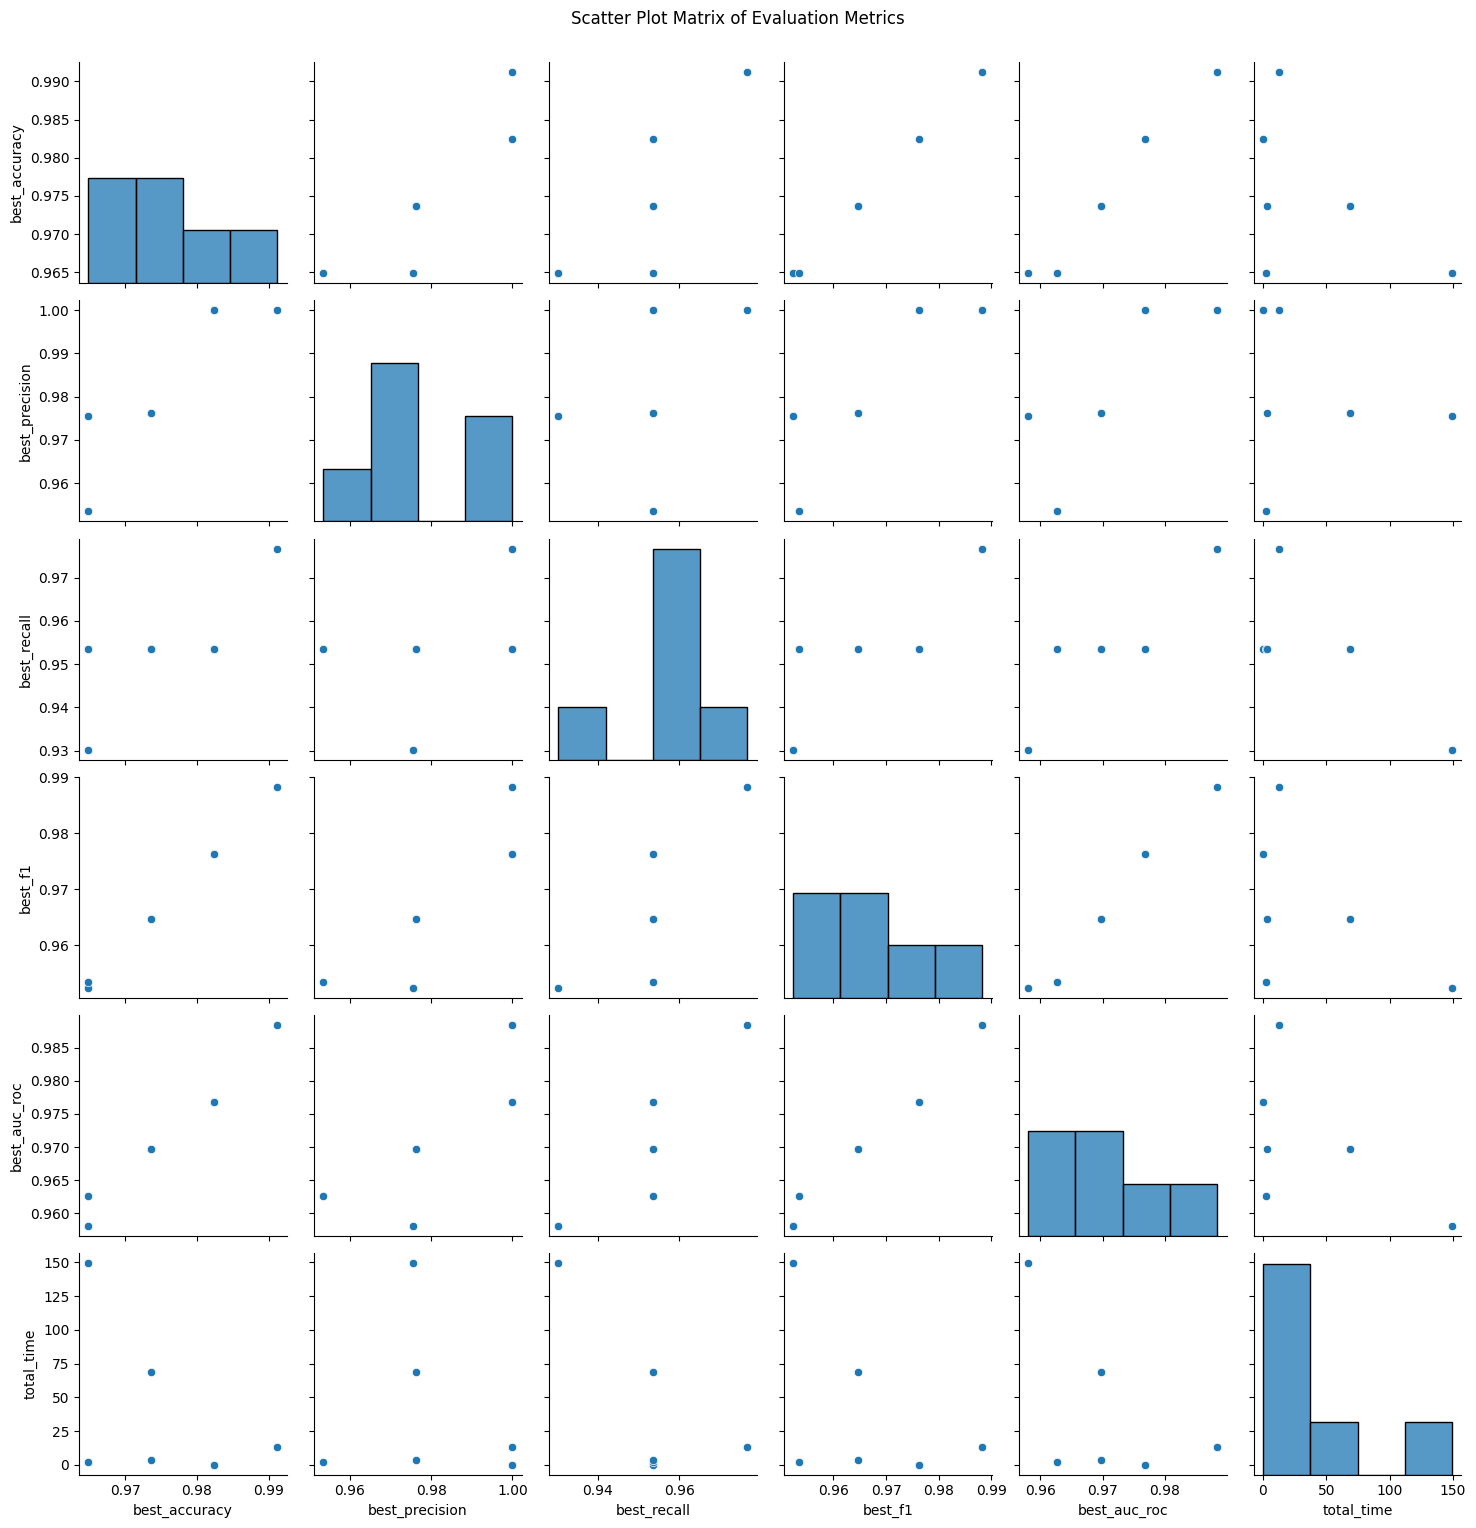

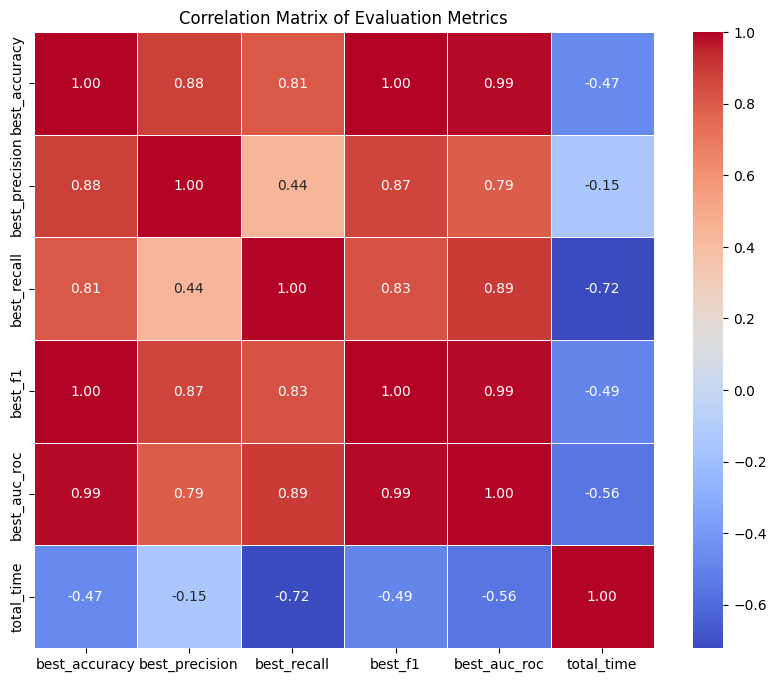

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd

# Create a DataFrame for the results
df = pd.DataFrame(results).T

# Scatter plot matrix
sns.pairplot(df[['best_accuracy', 'best_precision', 'best_recall', 'best_f1', 'best_auc_roc', 'total_time']])
plt.suptitle('Scatter Plot Matrix of Evaluation Metrics', y=1.02)
plt.show()

# Correlation matrix
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Evaluation Metrics')
plt.show()


# Rough Work

``1)Introduction``

2)``Brief overview of cancer-related diseases and the importance of early detection``.
	--> Introducing the breast cancer dataset

3)```Data Collection and Preprocessing``
	--> Data Cleaning
	--> One Hot Echoding
	--> Other methods for preprocessing

4)``Exploratory Data Analysis (EDA)``
	--> Showing Vizulizations b/w different variables
	--> Common Patterns and Trend

5)``Feature Selection and Engineering``
	--> Techniques used for feature selection and engineering to improve model performance. Brief overview
	--> Importance of selecting relevant features for disease detection.

6)``Machine Learning Models``
	--> Alogo 1 [ DTC Classifer ]
		* Mathematical Intution
		* Code Implementation in Python sklearn
		* Key advantages and disadvantages
		* Hyperparameter-Tuning

	--> Alogo 2 [ SVM ]
		* Mathematical Intution
		* Code Implementation in Python sklearn
		* Key advantages and disadvantages
		* Hyperparameter-Tuning

	--> Alogo 3 [ Random Forests Classifer ]
		* Mathematical Intution
		* Code Implementation in Python sklearn
		* Key advantages and disadvantages
		* Hyperparameter-Tuning

	--> Alogo 4 [ Neural  Networks ]
		* Mathematical Intution
		* Code Implementation in Python sklearn
		* Key advantages and disadvantages
		* Hyperparameter-Tuning

7)``Model Evaluation``
	--> Code implementation using python sklearn
	--> Comparasion using Accuracy , Precison , Recall , F1-Score
	--> Visualization b/w different findings


8) ``Finding and Conclusion``

9) ``Future Contributions``

10) ``Refrences``

``

In [ ]:
# Sample code for Model Training

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initializing models after importing
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(random_state=42)
log_reg = LogisticRegression(max_iter=10000, random_state=42)
knn = KNeighborsClassifier()

# Training models
random_forest.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
log_reg.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Predictions
rf_predictions = random_forest.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)
log_reg_predictions = log_reg.predict(X_test)
knn_predictions = knn.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest Recall:", recall_score(y_test, rf_predictions))

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_predictions))
print("XGBoost Recall:", recall_score(y_test, xgb_predictions))

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_predictions))
print("Logistic Regression Recall:", recall_score(y_test, log_reg_predictions))

print("KNN Accuracy:", accuracy_score(y_test, knn_predictions))
print("KNN Recall:", recall_score(y_test, knn_predictions))

Random Forest Accuracy: 0.9649122807017544
Random Forest Recall: 0.9859154929577465
XGBoost Accuracy: 0.956140350877193
XGBoost Recall: 0.971830985915493
Logistic Regression Accuracy: 0.9736842105263158
Logistic Regression Recall: 0.9859154929577465
KNN Accuracy: 0.9473684210526315
KNN Recall: 0.9577464788732394


## **Sample**

### Sample Model Trainning - No Tuning

### Sample Model Trainning - HyperParameter Tuning

https://www.who.int/health-topics/cancer


https://www.who.int/news-room/fact-sheets/detail/breast-cancer
